In [11]:
import pandas as pd 
import numpy as np 
import scipy 
import pylab 
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
import matplotlib as pyplot 
import seaborn as sns
%matplotlib inline 
pylab.rcParams.update9:({'font.size': 14})

In [6]:
df = pd.read_csv(r"C:\Users\snapp\Desktop\AI\Dataset\AnomalyData.csv")

In [7]:
df.head()

,State,state_code,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
0,Alabama,AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,...,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
1,Arizona,AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,Arkansas,AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,California,CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,Colorado,CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8


In [20]:
df.shape

(48, 30)

<AxesSubplot:xlabel='region', ylabel='data science'>

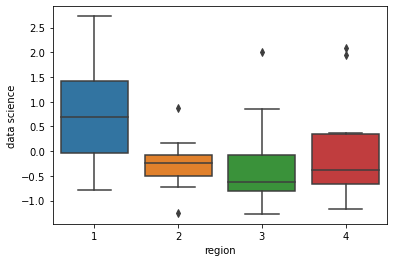

In [28]:
sns.boxplot(data = df, y = 'data science',x = 'region' )

In [40]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.5)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_limit = Q1 - 1.5 * IQR
    Upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[col] > Upper_limit)|(df[col] < Lower_limit)]
    df_no_outliers = df[(df[col] < Upper_limit)&(df[col] > Lower_limit)]
    return Q1,Q2,Q3, outliers, df_no_outliers

In [41]:
remove_outliers(df,'data science')

(-0.6625000000000001,
 -0.235,
 0.3525,
             State state_code  data science  cluster analysis  college  \
 3      California         CA          1.95             -0.62    -0.26   
 17       Maryland         MD          2.00              2.57     1.20   
 18  Massachusetts         MA          2.73              2.53     1.99   
 29       New York         NY          2.03              0.04     0.74   
 44     Washington         WA          2.09             -0.13     0.00   
 
     startup  entrepreneur   ceo  mortgage   nba  ...  obfuscation  unicorn  \
 3      2.02          0.46  1.27     -0.97  1.46  ...         0.70    -0.38   
 17     0.74          1.22  0.80      1.89  0.30  ...         2.59    -0.49   
 18     2.17          0.29  2.41      0.50  0.54  ...         1.47     0.00   
 29     0.44          0.93  2.46     -0.95  2.12  ...        -0.11    -0.51   
 44     2.40         -1.09  0.40     -0.04 -0.41  ...         1.94     1.82   
 
     Extraversion  Agreeableness  Cons